In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
parks = gpd.read_file('../data/Metro_Parks.geojson')
water = gpd.read_file('../data/Public_Water_Systems.geojson')
art = gpd.read_file('../data/Art_in_Public_places.csv')
print(parks.crs)
print(type(parks))
parks.head()

epsg:4326
<class 'geopandas.geodataframe.GeoDataFrame'>


acres                  name year_estab     common_nam status  \
0     69.86    Harpeth River Park       1988  Harpeth River   PARK   
1      9.88    Harpeth Knoll Park       1972  Harpeth Knoll   PARK   
2     17.14         Bellevue Park       1982    Red Caboose   PARK   
3    809.59       Bells Bend Park       2007     Bells Bend   PARK   
4  2168.792  Alvin G. Beaman Park       1996         Beaman   PARK   

                   address           lon          lat  \
0      7820 Coley Davis Rd   -86.9592214  36.07738249   
1  708 Goodpasture Terrace  -86.93815537  36.05942777   
2     656 Colice Jeanne Rd  -86.93354496  36.07159731   
3    4187 Old Hickory Blvd  -86.92646294  36.15016925   
4   5911 Old Hickory Blvd.  -86.91984207  36.26075833   

                                          descriptio  \
0  Harpeth River State Park has much historical a...   
1  Huge grassy field with playground, and shade s...   
2  Bellevue Park, known as Red Caboose Park, is p...   
3  Located in western Davidson County, this park ...   
4  Beaman Park provides education and awareness p...   

                                            geometry  
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...

In [3]:
parks = parks[['name', 'acres', 'geometry']]
print(parks.shape)
parks.head()

(287, 3)


name     acres  \
0    Harpeth River Park     69.86   
1    Harpeth Knoll Park      9.88   
2         Bellevue Park     17.14   
3       Bells Bend Park    809.59   
4  Alvin G. Beaman Park  2168.792   

                                            geometry  
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...

In [4]:
print(water.crs)
print(type(water))
water.head()

epsg:4326
<class 'geopandas.geodataframe.GeoDataFrame'>


name             location dog  \
0                          Beaman Water Fountain                 None   Y   
1             Edwin Nature Center Water Fountain  Restrooms Breezeway   N   
2  Percy Warner Belle Meade Gates Water Fountain    Belle Meade Gates   Y   
3                       West Park Water Fountain            Ballfield   N   
4                   Richland Park Water Fountain           Playground   N   

  objectid          lon ada cnt           lat                   feat_type  \
0    45921  36.26250456   Y   1  -86.89425346  Fountain/Bottle filler/ADA   
1    45937  36.06089915   Y   1  -86.90622747           Bottle Filler/ADA   
2    45964  36.08310102   Y   1  -86.86727566                    ADA Bowl   
3    45992  36.16179583   N   1  -86.86378994      Single with foot pedal   
4    46012  36.15139384   N   1  -86.84589094      Single with foot pedal   

                     geometry  
0  POINT (-86.89425 36.26250)  
1  POINT (-86.90623 36.06090)  
2  POINT (-86.86728 36.08310)  
3  POINT (-86.86379 36.16180)  
4  POINT (-86.84589 36.15139)

In [5]:
print(art.crs)
print(type(art))
print(art.info())
art.head()

None
<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              164 non-null    object  
 1   Artist Last Name   164 non-null    object  
 2   Artist First Name  164 non-null    object  
 3   Location           164 non-null    object  
 4   Medium             164 non-null    object  
 5   Type               164 non-null    object  
 6   Description        164 non-null    object  
 7   Latitude           164 non-null    object  
 8   Longitude          164 non-null    object  
 9   Mapped Location    164 non-null    object  
 10  geometry           0 non-null      geometry
dtypes: geometry(1), object(10)
memory usage: 14.2+ KB
None


Title Artist Last Name Artist First Name  \
0              Tommy Owen          LeQuire              Alan   
1  Water Fountain Shelter            Lewis              E.C.   
2     The Waterfall Mural            Deese             Bryan   
3                   Angel          Ralston           William   
4      The Peace Monument          Moretti          Giuseppe   

                                          Location  \
0                  4001 Harding Road, Nashville TN   
1  South 20th Street and Shelby Ave, Nashville, TN   
2                917 Woodland Street, Nashville TN   
3                  4715 Harding Pike, Nashville TN   
4        3381-3399 Granny White Pike, Nashville TN   

                             Medium       Type  \
0                            Bronze  Sculpture   
1                          Concrete  Sculpture   
2       Latex paint and spray paint      Mural   
3  Stone on concrete and brick base  Sculpture   
4     Bronze on Carrera marble base  Sculpture   

                                         Description   Latitude   Longitude  \
0                                                      36.12856    -86.8366   
1                                                      36.16986   -86.73595   
2  Mural painted celebrating the band My Morning ...  36.175636  -86.755652   
3  An elongated figure consisting of a stylized f...   36.11975   -86.85343   
4  The Ladies Battlefield Association commissione...   36.11465   -86.79233   

           Mapped Location geometry  
0     (36.12856, -86.8366)     None  
1    (36.16986, -86.73595)     None  
2  (36.175636, -86.755652)     None  
3    (36.11975, -86.85343)     None  
4    (36.11465, -86.79233)     None

In [6]:
art = art[['Title', 'Type', 'Latitude', 'Longitude', 'Mapped Location']]
print(art.shape)
print(type(art))
art.head()

(164, 5)
<class 'pandas.core.frame.DataFrame'>


Title       Type   Latitude   Longitude  \
0              Tommy Owen  Sculpture   36.12856    -86.8366   
1  Water Fountain Shelter  Sculpture   36.16986   -86.73595   
2     The Waterfall Mural      Mural  36.175636  -86.755652   
3                   Angel  Sculpture   36.11975   -86.85343   
4      The Peace Monument  Sculpture   36.11465   -86.79233   

           Mapped Location  
0     (36.12856, -86.8366)  
1    (36.16986, -86.73595)  
2  (36.175636, -86.755652)  
3    (36.11975, -86.85343)  
4    (36.11465, -86.79233)

In [7]:
water_at_parks = gpd.sjoin(water, parks, op = 'within')
water_at_parks.head()

name_left                 location dog  \
0                    Beaman Water Fountain                     None   Y   
1       Edwin Nature Center Water Fountain      Restrooms Breezeway   N   
29    Edwin Warner Dog Park Water Fountain                 Dog Park   Y   
30  Edwin Warner Concession Water Fountain         WNSL Concessions   N   
69                  Harpeth River Greenway  Butler Field Trail Head   Y   

   objectid          lon ada cnt           lat                   feat_type  \
0     45921  36.26250456   Y   1  -86.89425346  Fountain/Bottle filler/ADA   
1     45937  36.06089915   Y   1  -86.90622747           Bottle Filler/ADA   
29    46595  36.05195562   N   1  -86.90162012                    Dog Only   
30    46597  36.04998346   Y   1   -86.8981744                Standard/ADA   
69        0  36.05133033   N   1  -86.91617134  Standard/ADA/Bottle Filler   

                      geometry  index_right            name_right     acres  
0   POINT (-86.89425 36.26250)            4  Alvin G. Beaman Park  2168.792  
1   POINT (-86.90623 36.06090)            5     Edwin Warner Park   1113.12  
29  POINT (-86.90162 36.05196)            5     Edwin Warner Park   1113.12  
30  POINT (-86.89817 36.04998)            5     Edwin Warner Park   1113.12  
69  POINT (-86.91617 36.05133)            5     Edwin Warner Park   1113.12

In [8]:
water_at_parks = water_at_parks[['name_left', 'lon', 'lat', 'feat_type', 'geometry', 'name_right']]

In [9]:
water_at_parks = water_at_parks.rename(columns = {'name_left': 'water_name', 'name_right': 'park'})
print(water_at_parks.shape)
water_at_parks.head()

(61, 6)


water_name          lon           lat  \
0                    Beaman Water Fountain  36.26250456  -86.89425346   
1       Edwin Nature Center Water Fountain  36.06089915  -86.90622747   
29    Edwin Warner Dog Park Water Fountain  36.05195562  -86.90162012   
30  Edwin Warner Concession Water Fountain  36.04998346   -86.8981744   
69                  Harpeth River Greenway  36.05133033  -86.91617134   

                     feat_type                    geometry  \
0   Fountain/Bottle filler/ADA  POINT (-86.89425 36.26250)   
1            Bottle Filler/ADA  POINT (-86.90623 36.06090)   
29                    Dog Only  POINT (-86.90162 36.05196)   
30                Standard/ADA  POINT (-86.89817 36.04998)   
69  Standard/ADA/Bottle Filler  POINT (-86.91617 36.05133)   

                    park  
0   Alvin G. Beaman Park  
1      Edwin Warner Park  
29     Edwin Warner Park  
30     Edwin Warner Park  
69     Edwin Warner Park

In [10]:
art['Longitude'] = pd.to_numeric(art['Longitude'],errors='coerce')
art['Latitude'] = pd.to_numeric(art['Latitude'],errors='coerce')
art = art.dropna()

In [11]:
art['geometry'] = art.apply(lambda x: Point((float(x.Longitude), 
                                             float(x.Latitude))), 
                                        axis=1)
art.head(3)

Title       Type   Latitude  Longitude  \
0              Tommy Owen  Sculpture  36.128560 -86.836600   
1  Water Fountain Shelter  Sculpture  36.169860 -86.735950   
2     The Waterfall Mural      Mural  36.175636 -86.755652   

           Mapped Location                      geometry  
0     (36.12856, -86.8366)     POINT (-86.8366 36.12856)  
1    (36.16986, -86.73595)    POINT (-86.73595 36.16986)  
2  (36.175636, -86.755652)  POINT (-86.755652 36.175636)

In [12]:
art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 163
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            162 non-null    object 
 1   Type             162 non-null    object 
 2   Latitude         162 non-null    float64
 3   Longitude        162 non-null    float64
 4   Mapped Location  162 non-null    object 
 5   geometry         162 non-null    object 
dtypes: float64(2), object(4)
memory usage: 8.9+ KB


In [13]:
art_geo = gpd.GeoDataFrame(art, 
                           crs = water_at_parks.crs, 
                           geometry = art['geometry'])

In [14]:
art_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
art_at_parks = gpd.sjoin(art_geo, parks, op = 'within')
print(art_at_parks.shape)
art_at_parks.head()

(17, 9)


Title       Type  Latitude  Longitude  \
15       Reach for the Stars      Mural  36.14305  -86.78368   
18                     Ariel     Mobile  36.14764  -86.81311   
21            John W. Thomas  Sculpture  36.14888  -86.81357   
98   Parthenon West Pediment  Sculpture  36.14968  -86.81376   
105  Parthenon East Pediment  Sculpture  36.15007  -86.81308   

           Mapped Location                    geometry  index_right  \
15   (36.14305, -86.78368)  POINT (-86.78368 36.14305)           45   
18   (36.14764, -86.81311)  POINT (-86.81311 36.14764)           37   
21   (36.14888, -86.81357)  POINT (-86.81357 36.14888)           37   
98   (36.14968, -86.81376)  POINT (-86.81376 36.14968)           37   
105  (36.15007, -86.81308)  POINT (-86.81308 36.15007)           37   

                name   acres  
15   E. S. Rose Park   25.08  
18   Centennial Park  125.14  
21   Centennial Park  125.14  
98   Centennial Park  125.14  
105  Centennial Park  125.14

In [16]:
parkspolygon = parks[['name', 'geometry']]

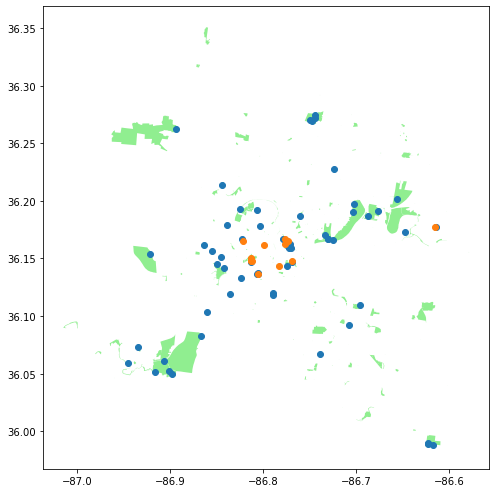

In [17]:
ax = parkspolygon.plot(figsize = (8, 10), color = 'lightgreen')
water_at_parks.plot( ax = ax)
art_at_parks.plot(ax = ax,);
plt.show();

In [18]:
area_center = [36.163, -86.77530]

In [19]:
map_awp = folium.Map(location = area_center, tiles='cartodbpositron', zoom_start = 11)

folium.GeoJson(parkspolygon, popup=folium.GeoJsonPopup(fields=['name'], labels=False), style_function=lambda feature: {
        'fillColor': 'green'}).add_to(map_awp)

for row_index, row_values in water_at_parks.iterrows() :
    loc = (row_values['lon'], row_values['lat']) 
    pop = str(row_values['feat_type']) 
    icon = folium.Icon(color='blue', icon='tint')
   
    marker = folium.Marker(
        location = loc, 
        popup = pop, 
        icon = icon)
    marker.add_to(map_awp)

for row_index, row_values in art_at_parks.iterrows() :
    loc = (row_values['Latitude'], row_values['Longitude']) 
    pop = str(row_values['Title']) + ': ' + str(row_values['Type'])
    icon = folium.Icon(color='orange', icon='paint-brush', prefix='fa')
   
    marker = folium.Marker(
        location = loc, 
        popup = pop, 
        icon = icon)
    marker.add_to(map_awp)  
    
map_awp.save('../maps/mapawp.html')
    
map_awp

In [20]:
cluster_map_awp = folium.Map(location = area_center, tiles='cartodbpositron', zoom_start = 11)

marker_cluster = MarkerCluster().add_to(cluster_map_awp)

folium.GeoJson(parkspolygon, popup=folium.GeoJsonPopup(fields=['name'], labels=False), style_function=lambda feature: {
        'fillColor': 'green'}).add_to(cluster_map_awp)

for row_index, row_values in water_at_parks.iterrows() :
    loc = (row_values['lon'], row_values['lat']) 
    pop = str(row_values['feat_type']) 
    icon = folium.Icon(color='blue', icon='tint')
   
    marker = folium.Marker(
        location = loc, 
        popup = pop, 
        icon = icon)
    marker.add_to(marker_cluster)

for row_index, row_values in art_at_parks.iterrows() :
    loc = (row_values['Latitude'], row_values['Longitude']) 
    pop = str(row_values['Title']) + ': ' + str(row_values['Type'])
    icon = folium.Icon(color='orange', icon='paint-brush', prefix='fa')
   
    marker = folium.Marker(
        location = loc, 
        popup = pop, 
        icon = icon)
    marker.add_to(marker_cluster)   
    
cluster_map_awp.save('../maps/clusterawp.html')

cluster_map_awp